1. import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
ds = pd.read_csv("Advertising.csv")

In [4]:
ds.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Drop unnecessary column
ds.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Summary statistics
print("Summary Statistics:\n", ds.describe())

Summary Statistics:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


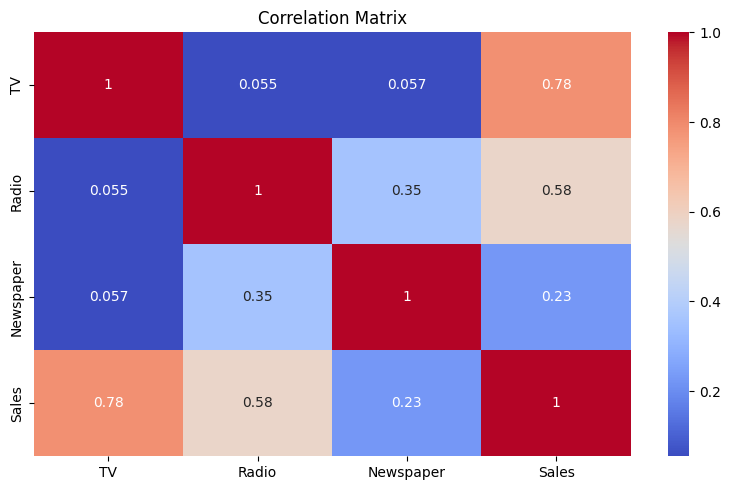

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [9]:
# Features and target
X = ds[['TV', 'Radio', 'Newspaper']]
y = ds['Sales']

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on test set
y_pred = model.predict(X_test)

In [13]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 3.17
R² Score: 0.90


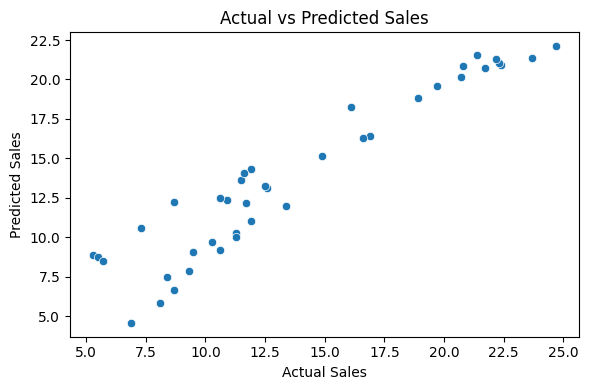

In [15]:
# Plotting actual vs predicted sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()

In [16]:
# Impact of advertising channels
coeff_ds = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nImpact of Advertising Channels:\n", coeff_ds)


Impact of Advertising Channels:
            Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761
